# Imports

In [1]:
# !pip install requirements.txt -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from PIL import Image
import os

# Importing Data

In [2]:
labelsPath = "C:\\Users\\Newbie\\Desktop\\LicensePlateRecognition-ANPR\\licensePlateDetection\\labels\\train"
imagePath = "C:\\Users\\Newbie\\Desktop\\LicensePlateRecognition-ANPR\\licensePlateDetection\\images\\train"
licensePlatePath = "C:\\Users\\Newbie\\Desktop\\LicensePlateRecognition-ANPR\\licensePlateRecognition"

In [3]:
license_recognition = pd.read_csv("Licplatesdetection_train.csv")
license_recognition.head()

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222


In [4]:
license_numbers = pd.read_csv("Licplatesrecognition_train.csv")
license_numbers.head()

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979


In [5]:
print(license_recognition.info(), license_numbers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   ymin    900 non-null    int64 
 2   xmin    900 non-null    int64 
 3   ymax    900 non-null    int64 
 4   xmax    900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   text    900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB
None None


* **Sample image display from both the sets**

  img_id  ymin  xmin  ymax  xmax
0  1.jpg   276    94   326   169


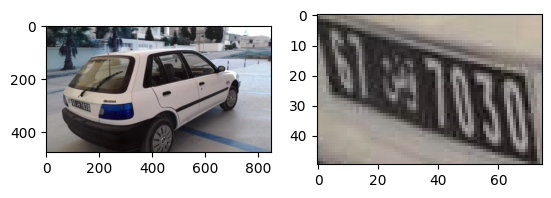

In [6]:
print(license_recognition.loc[license_recognition["img_id"] == "1.jpg"])
img = cv2.imread(imagePath + "/1.jpg")
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[1].imshow(img[276:326, 94:169])

1    128T8086
Name: text, dtype: object


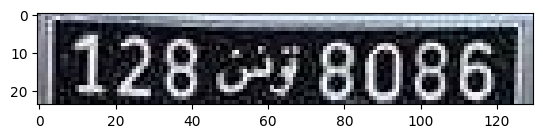

In [7]:
print(license_numbers.loc[license_numbers["img_id"] == "1.jpg"]["text"])
img = cv2.imread(licensePlatePath + "/1.jpg")
plt.imshow(img)

# Preparing dataset for YOLO model

In [8]:
# # Function to convert bounding box to YOLO format
# def convertToYolo(row, img_width, img_height):
#     xmin = row['xmin']
#     xmax = row['xmax']
#     ymin = row['ymin']
#     ymax = row['ymax']
    
#     # Calculate center coordinates, width, and height
#     center_x = (xmin + xmax) / 2 / img_width
#     center_y = (ymin + ymax) / 2 / img_height
#     width = (xmax - xmin) / img_width
#     height = (ymax - ymin) / img_height
    
#     return center_x, center_y, width, height

# for _, row in license_recognition.iterrows():
#     img_id = row['img_id']
#     img_path = os.path.join(imagePath, f"{img_id}")
    
#     with Image.open(img_path) as img:
#         img_width, img_height = img.size
    
#     center_x, center_y, width, height = convertToYolo(row, img_width, img_height)
    
#     class_id = 0
    
#     name = img_id[:-4]
#     label_path = os.path.join(labelsPath, f"{name}.txt")
#     with open(label_path, 'w') as f:
#         f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

# License Plate Detection using YOLO

In [9]:
model = YOLO("yolov8n.yaml")  
results = model.train(data="config.yaml", epochs = 5)  

Ultralytics YOLOv8.2.87  Python-3.12.5 torch-2.3.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 7.53MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\Newbie\Desktop\LicensePlateRecognition-ANPR\licensePlateDetection\labels\train... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<00:00, 1203.19it/s]

train: New cache created: C:\Users\Newbie\Desktop\LicensePlateRecognition-ANPR\licensePlateDetection\labels\train.cache



val: Scanning C:\Users\Newbie\Desktop\LicensePlateRecognition-ANPR\licensePlateDetection\labels\train.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      4.191      5.134      3.992          6        640: 100%|██████████| 57/57 [08:20<00:00,  8.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:42<00:00,  5.59s/it]


                   all        900        900   2.94e-05    0.00778    1.5e-05   3.63e-06

1 epochs completed in 0.187 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.87  Python-3.12.5 torch-2.3.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:32<00:00,  3.19s/it]


                   all        900        900   2.94e-05    0.00778    1.5e-05   3.63e-06
Speed: 2.7ms preprocess, 90.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train


In [12]:
res = pd.read_csv("C:\\Users\\Newbie\\Desktop\\LicensePlateRecognition-ANPR\\runs\\detect\\train\\results.csv")
res.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,4.1912,5.1343,3.9924,0.00003,0.00778,0.00001,0,5.4321,5.5821,4.3029,0.000655,0.000655,0.000655
